# **Multilayer Perceptron / Deep Neural Network**

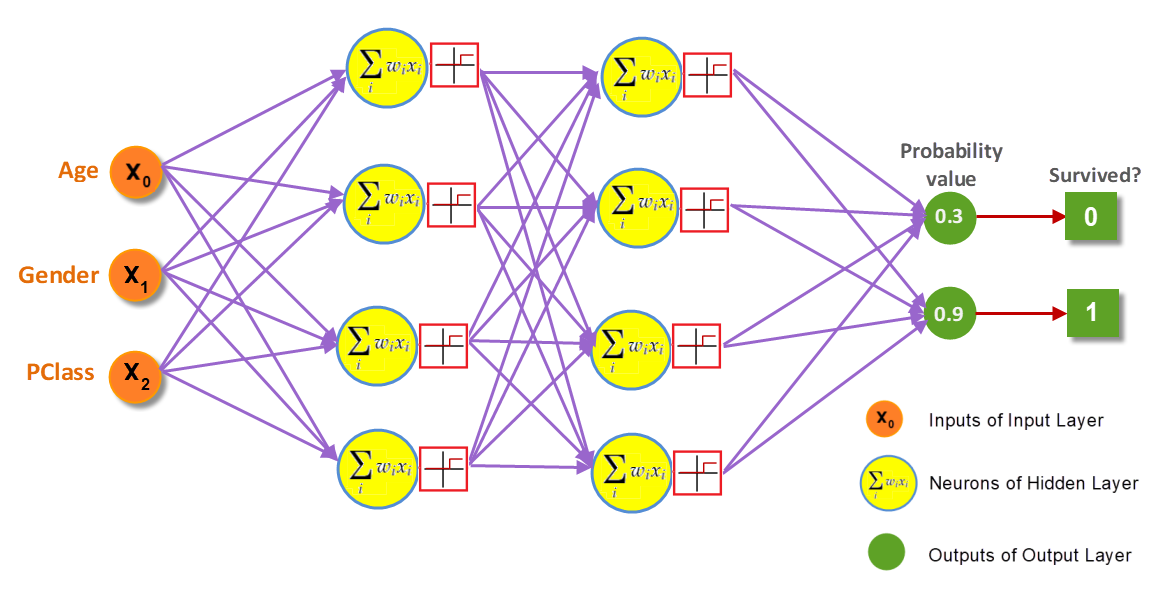

In [ ]:
# 필요한 기본 package 불러오기
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn import metrics
from sklearn.model_selection import GridSearchCV

# **1. MLP regressor using scikit-learn**

In [ ]:
!git clone https://github.com/yun-seon/LGES_DX-Expert_0620.git

Cloning into 'LGES_DX-Expert_0620'...
remote: Enumerating objects: 9, done.
remote: Counting objects: 100% (9/9), done.
remote: Compressing objects: 100% (8/8), done.
remote: Total 9 (delta 1), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (9/9), 1.56 MiB | 3.12 MiB/s, done.
Resolving deltas: 100% (1/1), done.


In [ ]:
# 데이터 불러오기
df = pd.read_csv("/content/LGES_DX-Expert_0620/house_prices.csv", encoding = "UTF-8-sig")
df = df.drop(['id', 'date', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long'], axis=1)
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1800,7503


In [ ]:
# 독립변수(X), 종속변수(Y) 구분
x = df.drop('price', axis=1)
y = df['price']

# Train data, Test data 분할
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

## Standardization

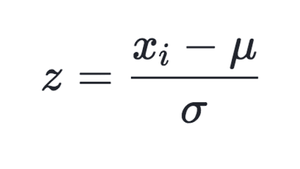

In [ ]:
# Standardization(평균 0, 분산 1) 함수 정의
scaler = StandardScaler()

# 정규화 수행
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 정규화된 데이터 확인
pd.DataFrame(X_train_scaled, columns = df.columns[1:]).head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,sqft_living15,sqft_lot15
0,1.756928,1.147050,0.197063,-0.208367,-0.913717,-0.084646,-0.307809,-0.623384,-0.557111,-0.551882,1.444779,-0.067412,-0.119570
1,-0.393829,-1.453081,-0.917937,-0.138866,-0.913717,-0.084646,-0.307809,-0.623384,-0.557111,-0.660501,-0.662725,-1.073709,-0.125154
2,0.681550,-0.478032,0.065887,0.865754,-0.913717,-0.084646,-0.307809,2.444301,-0.557111,0.425692,-0.662725,-0.388261,3.225665
3,-1.469207,-0.478032,-0.983525,1.006722,-0.913717,-0.084646,-0.307809,-0.623384,0.294715,-0.732914,-0.662725,-0.738277,1.620387
4,-0.393829,0.822034,1.049710,0.231836,0.939440,-0.084646,-0.307809,0.910458,1.998365,1.511884,-0.662725,1.143061,-0.258121


In [ ]:
# sklearn 활용한 MLP regressor 정의
mlp_reg = MLPRegressor(hidden_layer_sizes=(150,100,50),
                       max_iter = 300,activation = 'relu',
                       solver = 'adam')

# 모델 학습
mlp_reg.fit(X_train_scaled, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPRegressor(hidden_layer_sizes=(150, 100, 50), max_iter=300)

In [ ]:
# 모델 기반 예측
y_pred = mlp_reg.predict(X_test_scaled)

df_temp = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df_temp.head()

,Actual,Predicted
16091,588000.0,457237.753068
9216,340000.0,498272.494145
8310,225000.0,325513.170735
8687,700000.0,477400.141292
5696,660000.0,497444.874299


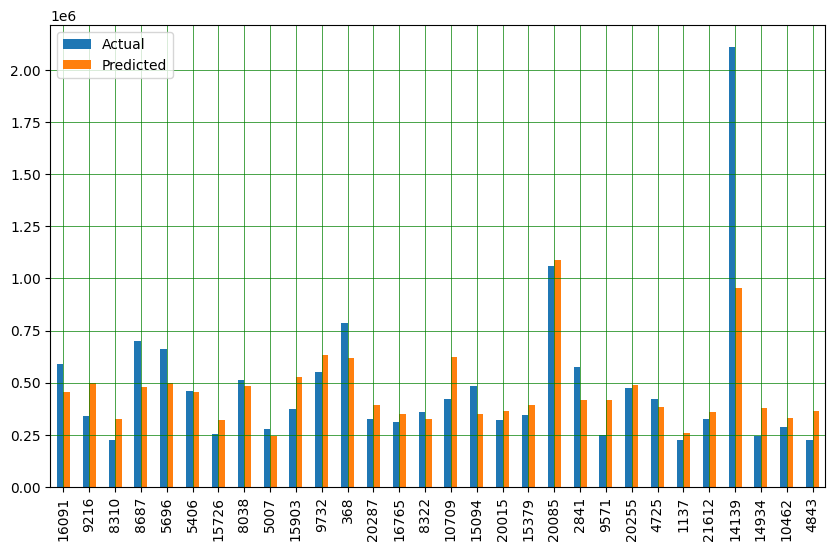

In [ ]:
# 정답과 예측 값 간의 비교
df_temp = df_temp.head(30)
df_temp.plot(kind='bar',figsize=(10,6))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

Evaluation Metrics:

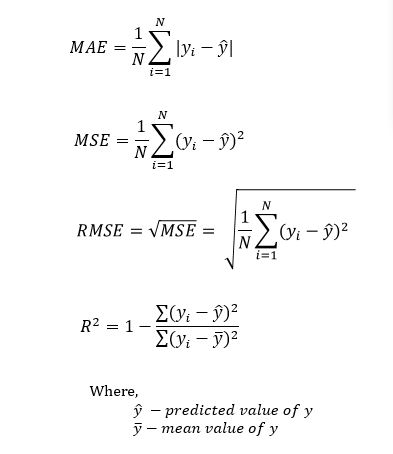

In [ ]:
# MLP regressor 성능 지표 확인
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2 score:', metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 123107.22304972849
Mean Squared Error: 33137781157.164215
Root Mean Squared Error: 182037.8563847757
R2 score: 0.7144444549133813


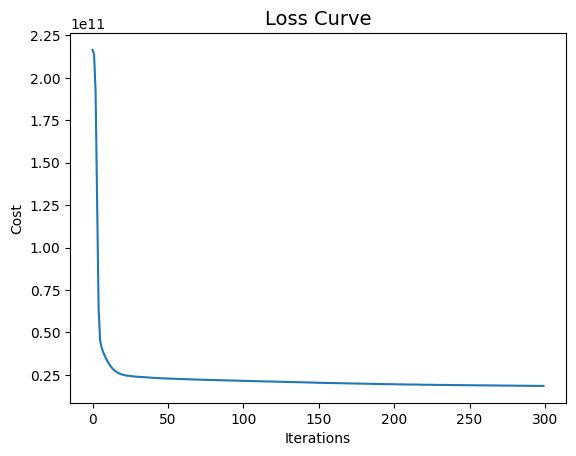

In [ ]:
# MLP 모델의 loss 확인 (최종적으로 수렴)
plt.plot(mlp_reg.loss_curve_)
plt.title("Loss Curve", fontsize=14)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.show()

In [ ]:
# Linear Regression (비교용)
from sklearn.linear_model import LinearRegression

# LR 모델 정의
lr = LinearRegression()
# LR 모델 학습
lr.fit(X_train, y_train)
# LR 모델 예측
y_pred_lr = lr.predict(X_test_scaled)
temp_lr = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_lr})

# LR 모델 성능 지표 확인
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_lr))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_lr))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_lr)))
print('R2 score:', metrics.r2_score(y_test, y_pred_lr))

Mean Absolute Error: 1320256.6551844494
Mean Squared Error: 1947082435386.3738
Root Mean Squared Error: 1395378.957626341
R2 score: -15.77843738325047


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


# **2. MLP regressor using Pytorch**

In [58]:
# 필요한 기본 package 불러오기
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.init as init

from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [47]:
# 정규화된 데이터 확인
pd.DataFrame(X_train_scaled, columns = df.columns[1:]).head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,sqft_living15,sqft_lot15
0,1.756928,1.147050,0.197063,-0.208367,-0.913717,-0.084646,-0.307809,-0.623384,-0.557111,-0.551882,1.444779,-0.067412,-0.119570
1,-0.393829,-1.453081,-0.917937,-0.138866,-0.913717,-0.084646,-0.307809,-0.623384,-0.557111,-0.660501,-0.662725,-1.073709,-0.125154
2,0.681550,-0.478032,0.065887,0.865754,-0.913717,-0.084646,-0.307809,2.444301,-0.557111,0.425692,-0.662725,-0.388261,3.225665
3,-1.469207,-0.478032,-0.983525,1.006722,-0.913717,-0.084646,-0.307809,-0.623384,0.294715,-0.732914,-0.662725,-0.738277,1.620387
4,-0.393829,0.822034,1.049710,0.231836,0.939440,-0.084646,-0.307809,0.910458,1.998365,1.511884,-0.662725,1.143061,-0.258121


### *Tensor*


*   데이터의 다차원 배열로, 몇 차원 배열인지에 관한 정보를 tensor의 rank로 표현함
*   Scalar: [1]
*   Vector: [1, 1]
*   Matrix: [[1, 1], [1, 1]]
*   3d-tensor: [[[1, 1], [1, 1]], [[1, 1], [1, 1]], [[1, 2], [2, 1]]]


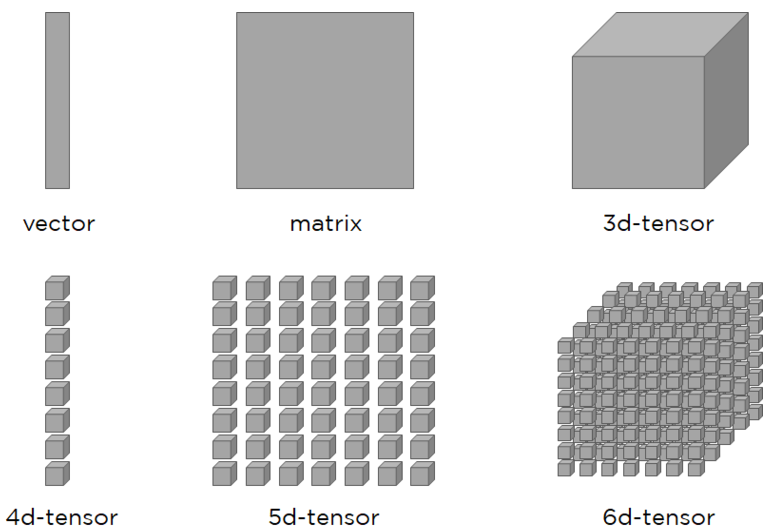

In [48]:
X_train_tensor = torch.Tensor(X_train_scaled)
X_test_tensor  = torch.Tensor(X_test_scaled)
y_train_tensor = torch.Tensor(y_train.values)
y_test_tensor  = torch.Tensor(y_test.values)

print(X_train_tensor.shape, X_test_tensor.shape, y_train_tensor.shape, y_test_tensor.shape)

torch.Size([17290, 13]) torch.Size([4323, 13]) torch.Size([17290]) torch.Size([4323])


In [49]:
'''
nn.Sequential: nn.Linear, nn.ReLU와 같은 모듈을 인수로 받아 순서대로 정렬한 후, 입력값에 대해 해당 모듈을 순차적으로 실행해 결괏값을 리턴하는 클래스
* 인공신경망 깊이가 깊어질수록 한 모듈로 묶어서 실행하는 것이 효율적임
'''
# ANN 모델 구조 정의
model = nn.Sequential(
    nn.Linear(13,150),
    nn.ReLU(),
    nn.Linear(150,100),
    nn.ReLU(),
    nn.Linear(100,50),
    nn.ReLU(),
    nn.Linear(50,13),
    nn.ReLU(),
    nn.Linear(13,1)
    )

## **Cost Function 정의**

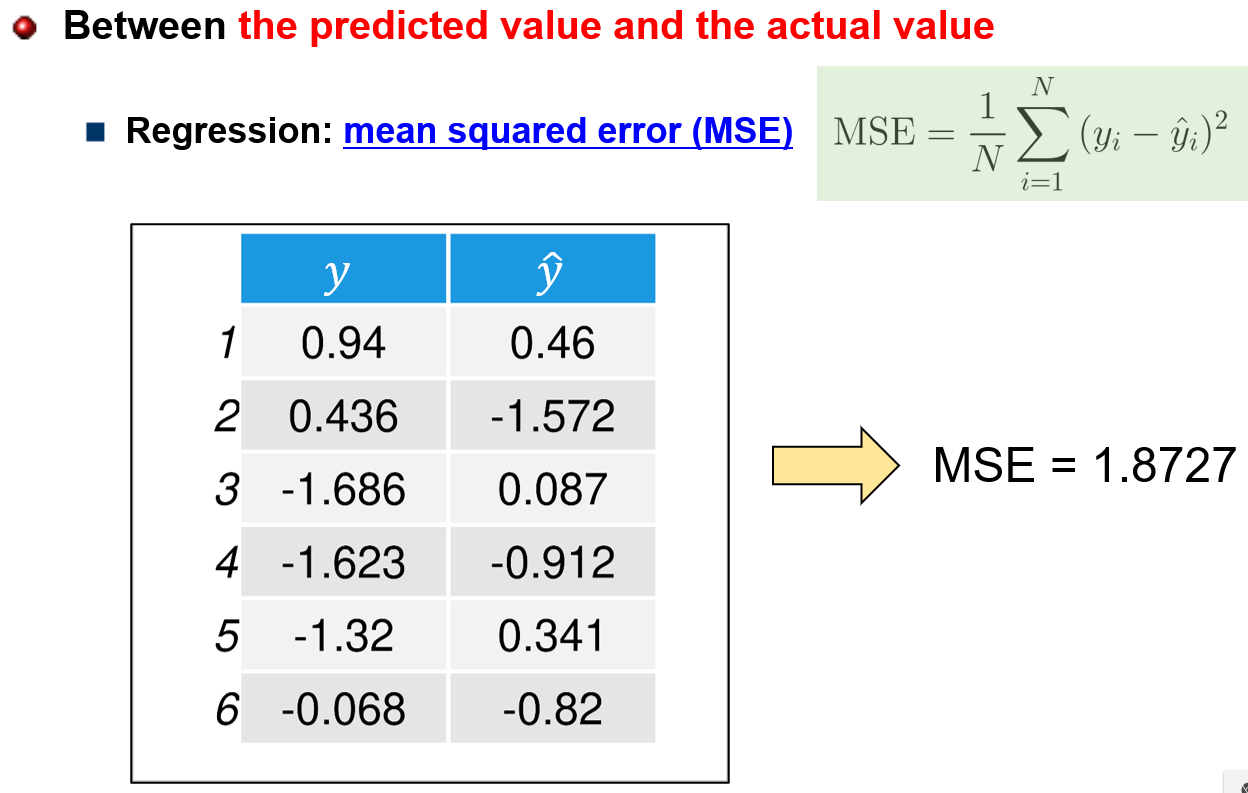

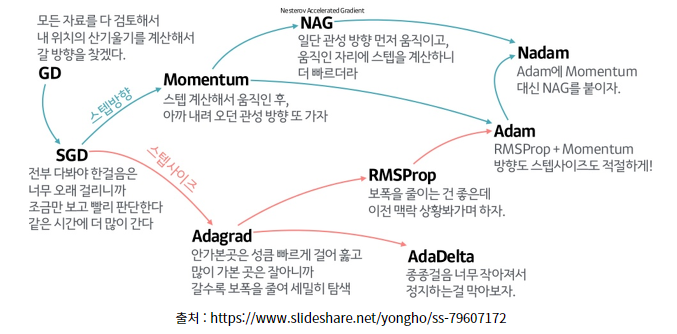

In [60]:
# Loss function (Cost function)과 Optimizer 정의

loss_func = nn.MSELoss()   # L1 loss: MAE / L2 loss: MSE (ex. nn.MSELoss())
optimizer = optim.Adam(model.parameters(), lr=0.01)

In [ ]:
# 모델 loss 연산
loss_array = []
num_epoch = 500

for i in tqdm(range(num_epoch)):

    # gradient 초기화
    optimizer.zero_grad()
    # 출력 계산
    output = model(X_train_tensor)
    # MSE loss 계산
    loss = loss_func(output, y_train_tensor)
    # loss에 대한 gradient 역전파(backpropagation)
    loss.backward()
    # 계산된 gradient 기반으로 모델의 파라미터 업데이트
    optimizer.step()
    # loss 저장
    loss_array.append(loss.detach().numpy())

    if i % 50 == 0:
        print(f'Epoch {i}\'s Loss: {loss}')

  0%|          | 0/500 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([17290])) that is different to the input size (torch.Size([17290, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch 0's Loss: 200423374848.0
Epoch 50's Loss: 140216631296.0
Epoch 100's Loss: 132427276288.0
Epoch 150's Loss: 130259468288.0
Epoch 200's Loss: 129523122176.0
Epoch 250's Loss: 129188044800.0


In [ ]:
# 모델 loss plotting을 통해, 수렴 여부 확인
plt.plot(loss_array)
plt.grid(True)
plt.show()

In [ ]:
# 모델 검증 함수 정의
def evaluate_model(model, x, y_true):
    model.eval()
    with torch.no_grad():
        y_pred = model(x)
        mse = mean_squared_error(y_true.numpy(), y_pred.numpy())
        mae = mean_absolute_error(y_true.numpy(), y_pred.numpy())
        rmse = np.sqrt(mse)
        mape = np.mean(np.abs((y_true.numpy() - y_pred.numpy()) / y_true.numpy())) * 100
        r2 = r2_score(y_true.numpy(), y_pred.numpy())
    return mse, mae, rmse, mape, r2

# 모델 검증 수행
mse_val, mae_val, rmse_val, mape_val, r2_val = evaluate_model(model, X_test_tensor, y_test_tensor)

print(f'\nValidation Results:')
print(f'MSE: {mse_val:.4f}')
print(f'MAE: {mae_val:.4f}')
print(f'RMSE: {rmse_val:.4f}')
print(f'MAPE: {mape_val:.4f}%')
print(f'R2 Score: {r2_val:.4f}')